In [244]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


dimensions de X:  (100, 2)
dimensions de y:  (100, 1)


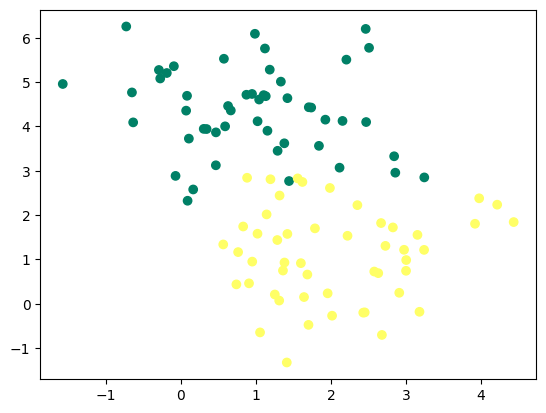

In [245]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X: ', X.shape)
print('dimensions de y: ', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

In [246]:
def initialsisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [247]:
W, b = initialsisation(X)
#b.shape

In [248]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [249]:
A = model(X, W, b)
#A.shape

In [250]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1-y) * np.log(1-A))

In [251]:
#log_loss(A, y)

In [252]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A-y)
    return (dW, db)

In [253]:
dW, db = gradients(A, X, y)
#db.shape

In [254]:
def update(dW, db, W, b, learnig_rate):
    W = W - learnig_rate * dW
    b = b - learnig_rate * db
    return (W, b)

In [255]:
def predict(X, W, b):
    A =  A = model(X, W, b)
    #print(A)
    return 0.5 <= A

In [256]:
from sklearn.metrics import accuracy_score

In [257]:
def artificial_neurone(X, y, learnig_rate=0.1, n_iter=100):
    W, b = initialsisation(X)
    Loss = []
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learnig_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))
    plt.plot(Loss)
    plt.show()

    return (W, b)

0.89


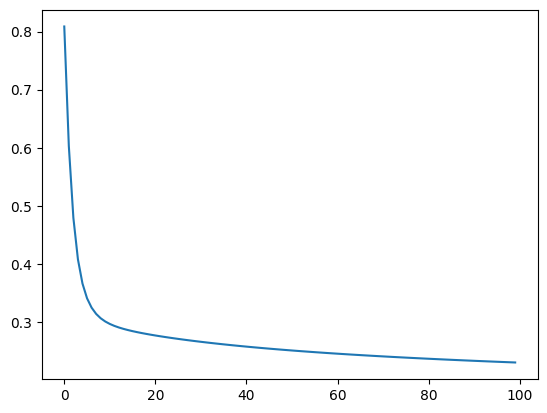

In [258]:
W, b = artificial_neurone(X, y)

In [259]:
W, b

(array([[ 1.27617473],
        [-1.08875327]]),
 array([0.56794395]))

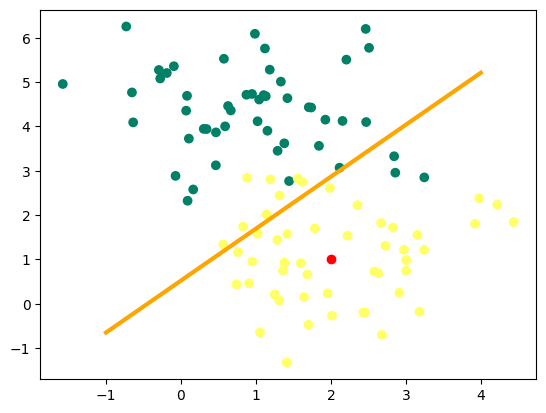

array([ True])

In [260]:
new_plant = np.array([2, 1])
x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 - b) / W[1]

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x0, x1, c='orange', lw=3);
plt.show()
predict(new_plant, W, b)